In [1]:
# Import Data Manipulation Libraries
import numpy as np
import pandas as pd

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Filter Warnings Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Logging Files
import logging
logging.basicConfig(level= logging.INFO,
                    filemode= 'w',
                    filename= 'model.log',
                    format= '%(asctime)s %(levelname)s %(message)s',force=True
                    )

# Import Stats Scipy Library
import scipy.stats as stats

In [2]:
# Data Import Using Pandas Function

url = 'https://raw.githubusercontent.com/mukeshmagar543/BankMarketing_MLModel/refs/heads/main/BankTelemarketing.csv'

df = pd.read_csv(url,sep = ';')

df.sample(frac= 1) # Shuffle Dataset


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
30994,32,management,single,tertiary,no,261,no,no,cellular,9,feb,13,5,-1,0,unknown,no
18117,35,unemployed,single,secondary,no,0,no,no,cellular,30,jul,740,3,-1,0,unknown,no
43807,23,student,single,tertiary,no,691,no,no,cellular,27,may,1178,1,178,6,success,yes
41016,56,retired,married,primary,no,9367,no,no,cellular,13,aug,320,2,101,2,success,yes
24264,49,management,married,tertiary,no,64,no,no,cellular,17,nov,208,1,159,1,success,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43150,30,student,single,secondary,no,48,no,no,cellular,25,feb,217,1,191,2,success,yes
34440,43,technician,married,secondary,no,994,yes,yes,cellular,5,may,51,1,-1,0,unknown,no
5015,35,technician,married,secondary,no,1,yes,yes,unknown,21,may,85,1,-1,0,unknown,no
30832,46,self-employed,married,tertiary,no,291,no,no,cellular,9,feb,105,4,-1,0,unknown,no


In [3]:
# Checking Data Shape and Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
logging.info('Dataset Uploaded Successfully')

In [5]:
# Split the Dataset into Numerical_Data and Categorical_Data
Numerical_Data = df.select_dtypes(exclude = 'object')

Categorical_Data = df.select_dtypes(include = 'object')

In [6]:
# Checking Numerical_Data
Numerical_Data

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [7]:
# Checking Categorical_Data
Categorical_Data

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [8]:
# Checking Descriptive Stats : Numerical_Data and Categorical_Data
# Univariate Analysis
from collections import OrderedDict

stats = []

for i in Numerical_Data:
    numerical_stats = OrderedDict({
        'Feature' : i,
        'Maximum' : Numerical_Data[i].max(),
        'Minimum' : Numerical_Data[i].min(),
        'Mean' : Numerical_Data[i].mean(),
        "25%" : Numerical_Data[i].quantile(0.25),
        'Median' : Numerical_Data[i].quantile(0.50),
        '75%' : Numerical_Data[i].quantile(0.75),
        'Kurtosis' : Numerical_Data[i].kurt(),
        "Skewness" : Numerical_Data[i].skew(),
        'Standard Deviation' : Numerical_Data[i].std()
    })

    stats.append(numerical_stats)

    report = pd.DataFrame(stats)

report

,Feature,Maximum,Minimum,Mean,25%,Median,75%,Kurtosis,Skewness,Standard Deviation
0,age,95,18,40.936210,33.0,39.0,48.0,0.319570,0.684818,10.618762
1,balance,102127,-8019,1362.272058,72.0,448.0,1428.0,140.751547,8.360308,3044.765829
2,day,31,1,15.806419,8.0,16.0,21.0,-1.059897,0.093079,8.322476
3,duration,4918,0,258.163080,103.0,180.0,319.0,18.153915,3.144318,257.527812
4,campaign,63,1,2.763841,1.0,2.0,3.0,39.249651,4.898650,3.098021
5,pdays,871,-1,40.197828,-1.0,-1.0,-1.0,6.935195,2.615715,100.128746
6,previous,275,0,0.580323,0.0,0.0,0.0,4506.860660,41.846454,2.303441


In [9]:
logging.info('The above Datset is Non Normal Distributed')

In [10]:
# Checking Categorical Dataset Stats
for i in Categorical_Data:
    print(Categorical_Data[i].value_counts())
    print('*'*40)

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
****************************************
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
****************************************
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
****************************************
default
no     44396
yes      815
Name: count, dtype: int64
****************************************
housing
yes    25130
no     20081
Name: count, dtype: int64
****************************************
loan
no     37967
yes     7244
Name: count, dtype: int64
****************************************
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype

- As The Categorical columns not showing any specific order so Label Encoding Technique is Recommended.
- The Numerical columns shows Non Noraml Distribution, hence the Tree Based Algorithm is Sugested.

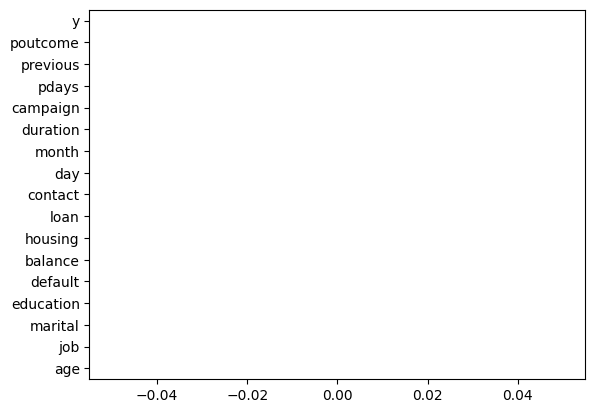

In [11]:
# Checking missing information if any using Graphical Method
df.isnull().sum().plot(kind = "barh")
plt.show()

In [12]:
# Checking Output  i.e. Target Column for Data Distribution
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [13]:
# Encoding Target Column
# No - 0 and Yes - 1 
df['y'] = df['y'].replace({'no': 0,'yes': 1})

In [14]:
# Encoding Target Column
# No - 0 and Yes - 1 
df['default'] = df['default'].replace({'no': 0,'yes': 1})

In [15]:
# Encoding Target Column
# No - 0 and Yes - 1 
df['housing'] = df['housing'].replace({'no': 0,'yes': 1})

In [16]:
# Encoding Target Column
# No - 0 and Yes - 1 
df['loan'] = df['loan'].replace({'no': 0,'yes': 1})

In [17]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [19]:
# Using Label Encoding Technique
from sklearn.preprocessing import LabelEncoder
df['job'] = LabelEncoder().fit_transform(df['job'])
df['marital'] = LabelEncoder().fit_transform(df['marital'])
df['education'] = LabelEncoder().fit_transform(df['education'])
df['contact'] = LabelEncoder().fit_transform(df['contact'])
df['month'] = LabelEncoder().fit_transform(df['month'])
df['poutcome'] = LabelEncoder().fit_transform(df['poutcome'])

In [20]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [ ]:
# Alternative Code
'''
le = LabelEncoder()
for i in Categorical_Data:
    df[i] = le.fit_transform(df[i])
'''

In [ ]:
# The Target Column Shows Imbalanced 
df['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [ ]:
# Balancing The Target Column Using SMOTE Technique

# Step 1 : Divide Dataset into x and y

# X : Independant Column and y : Target Column

X = df.drop(columns = 'y')  # Independant Column : 16

y =df['y']  # Target Column : 1

# Step 2 : Split the Dataset into Train and Test
# 100% -----> 70% Data is used for Training [Seen Data] and 30% Data [Unseen Data] is used for Testing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 7)

y_test

# Step 3 : Normalization Scaling Technique



# Step 4 : Using SMOTE Technique to Balance Target Column


33177    0
1544     0
44480    0
17886    0
12505    0
        ..
34418    0
11563    0
43842    1
18061    0
33000    0
Name: y, Length: 13564, dtype: int64